<a href="https://colab.research.google.com/github/PrinceWallyy/MachineLearning/blob/master/ACML_Assignment_2_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocess

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.datasets import cifar10
from keras.utils import np_utils

np.random.seed(42)
tf.random.set_seed(42)

In [2]:
(x_train, _), (x_test, _) = cifar10.load_data()
data = np.vstack((x_train, x_test))
data = data / 255
(x_train, x_val, x_test) = np.vsplit(data, np.array([48000, 54000]))
assert x_train.shape == (48000, 32, 32, 3)
assert x_val.shape == (6000, 32, 32, 3)
assert x_test.shape == (6000, 32, 32, 3)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

170508288/170498071 [==============================] - 2s 0us/step


# Convolutional AutoEncoder

In [3]:
input_shape = (32, 32, 3)

In [4]:
def createModel():
  model = models.Sequential()
  model.add(layers.Conv2D(8, (3, 3), padding='same', activation='relu', input_shape=input_shape))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(layers.Conv2D(12, (3, 3), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(layers.Conv2D(16,(3, 3), padding='same', activation='relu'))
  model.add(layers.UpSampling2D(size=(2, 2)))

  model.add(layers.Conv2D(12, (3, 3), padding='same', activation='relu'))
  model.add(layers.UpSampling2D(size=(2, 2)))

  model.add(layers.Conv2D(3, (3, 3), padding='same', activation='sigmoid'))

  return model

In [5]:
model = createModel()
model.compile(optimizer='adam', loss='mean_squared_error', metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 12)        876       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 12)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          1744      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 12)        1

# Training

In [6]:
history = model.fit(x_train, x_train, epochs=10, validation_data=(x_val, x_val))

Epoch 1/10
1500/1500 [==============================] - 41s 7ms/step - loss: 0.0104 - accuracy: 0.6541 - val_loss: 0.0069 - val_accuracy: 0.7389
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0061 - accuracy: 0.7500 - val_loss: 0.0057 - val_accuracy: 0.7586
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0054 - accuracy: 0.7643 - val_loss: 0.0051 - val_accuracy: 0.7665
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0050 - accuracy: 0.7720 - val_loss: 0.0049 - val_accuracy: 0.7754
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0048 - accuracy: 0.7778 - val_loss: 0.0047 - val_accuracy: 0.7892
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0047 - accuracy: 0.7813 - val_loss: 0.0046 - val_accuracy: 0.7930
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0046 - accuracy: 0.7839 - val_loss: 0.0045 - val_ac

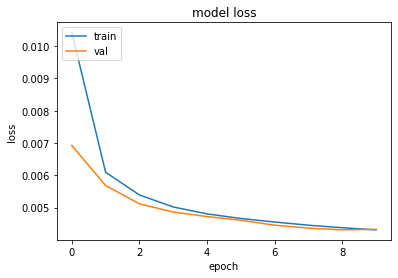

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Evaluation

In [8]:
loss, accuracy = model.evaluate(x_test, x_test)
print('Test Error Rate: ', round((1 - accuracy) * 100, 2))

188/188 [==============================] - 1s 4ms/step - loss: 0.0043 - accuracy: 0.7962
Test Error Rate:  20.38


In [9]:
pred_imgs = model.predict(x_test)

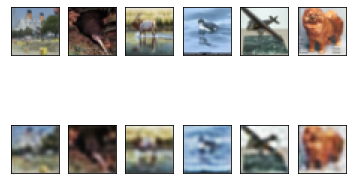

In [10]:
n = 6
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()